In [56]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [57]:
dat = pd.read_csv(r"C:\Users\user\Desktop\incm.csv")
print(dat.head())

      Name  Age  Income
0      Rob   27   70000
1  Michael   29   90000
2    Mohan   29   61000
3   Ismail   28   60000
4     Kory   42  150000


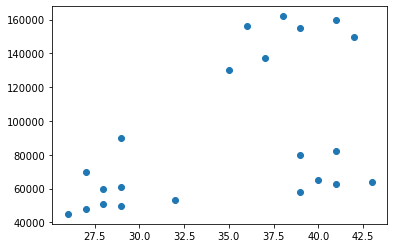

In [58]:
plt.scatter(dat["Age"],dat["Income"])

In [59]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [60]:
y_predicted = km.fit_predict(dat[["Age","Income"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [61]:
dat["cluter"] = y_predicted
dat.head()

,Name,Age,Income,cluter
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [62]:
dat1 = dat[dat.cluter == 0 ]
dat2 = dat[dat.cluter == 1 ]
dat3 = dat[dat.cluter == 2 ]

No handles with labels found to put in legend.


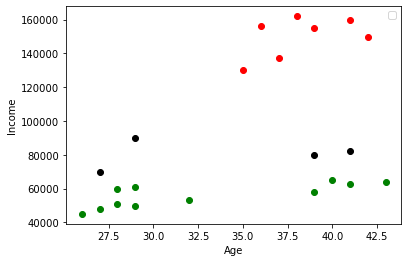

In [63]:
plt.scatter(dat1.Age,dat1["Income"],color = "green")
plt.scatter(dat2.Age,dat2["Income"],color = "red")
plt.scatter(dat3.Age,dat3["Income"],color = "black")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [64]:
scaler = MinMaxScaler()

In [65]:
scaler.fit(dat[["Income"]])

MinMaxScaler()

In [66]:
dat[["Income"]] = scaler.transform(dat[["Income"]])
dat.head()

,Name,Age,Income,cluter
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [67]:
scaler.fit(dat[["Age"]])

MinMaxScaler()

In [68]:
dat[["Age"]] = scaler.transform(dat[["Age"]])
dat.head()

,Name,Age,Income,cluter
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [69]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(dat[["Age","Income"]])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [70]:
dat["cluster"] = y_predicted
dat.drop("cluter",axis = "columns",inplace = True)
dat.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [71]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

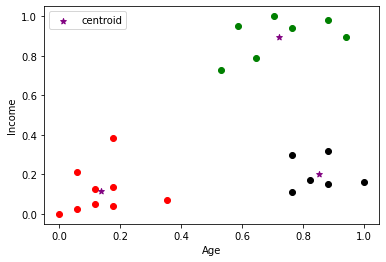

In [72]:
dat1 = dat[dat.cluster == 0 ]
dat2 = dat[dat.cluster == 1 ]
dat3 = dat[dat.cluster == 2 ]

plt.scatter(dat1.Age,dat1["Income"],color = "green")
plt.scatter(dat2.Age,dat2["Income"],color = "red")
plt.scatter(dat3.Age,dat3["Income"],color = "black")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker = "*",label= "centroid")

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [73]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(dat[["Age","Income"]])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22443334487241415,
 0.17840674931327935,
 0.13265419827245162,
 0.10497488680620906]

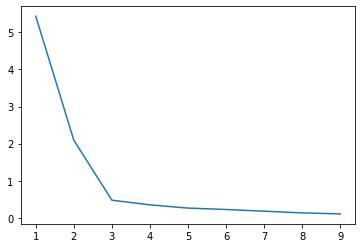

In [75]:
plt.xlabel
plt.ylabel
plt.plot(k_rng,sse)